# Logistic Regression

**Logistic Regression** is a type of regression analysis used to predict the probability of a binary outcome (1/0, True/False, Yes/No) based on one or more predictor variables (features). Despite its name, logistic regression is primarily used for classification problems, not regression.

* **Linear model:** ŷ = b0+b1x
* **Sigmoid function:** σ(z) = 1/(1+e−z)
* **Logistic regression model:** ŷ = σ(b0+b1x) = 1/(1+e-(b0+b1x))

So, unlike linear regression, we get an ‘S’ shaped curve in logistic regression.

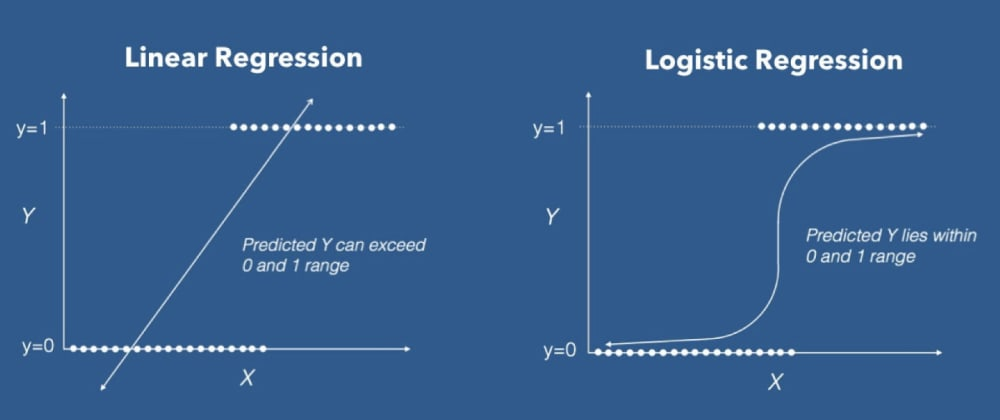

* The output of the logistic function is a value between 0 and 1, which can be interpreted as a probability. If the probability exceeds a certain threshold (typically 0.5), the output class is predicted as 1; otherwise, it's predicted as 0.

### Mathematics Behind Logistic Regression:

- Logistic regression uses the **logistic function (sigmoid function)** to map predicted values to probabilities.
- The logistic function is defined as:
  
  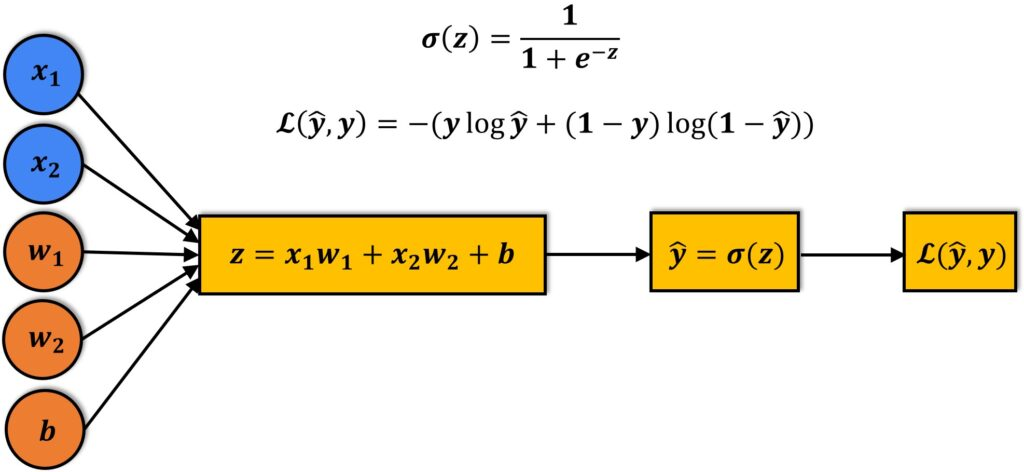


### **Types of Logistic Regression**
* **Binary Logistic Regression:** Binary logistic regression is used to predict the probability of a binary outcome, such as yes or no, true or false, or 0 or 1. For example, it could be used to predict whether a customer will churn or not, whether a patient has a disease or not, or whether a loan will be repaid or not.

* **Multinomial Logistic Regression:** Multinomial logistic regression is used to predict the probability of one of three or more possible outcomes, such as the type of product a customer will buy, the rating a customer will give a product, or the political party a person will vote for.

* **Ordinal Logistic Regression:** Ordinal logistic regression is used to predict the probability of an outcome that falls into a predetermined order, such as the level of customer satisfaction, the severity of a disease, or the stage of cancer.

### **Uses of Logistic Regression:**

* **Binary Classification:** Logistic regression is most commonly used for binary classification tasks, such as determining whether an email is spam or not, or predicting whether a customer will buy a product.
* **Probability Estimation:** It can estimate the probability that a given input belongs to a particular class.
* **Medical Applications:** Used to predict the presence or absence of a disease based on patient characteristics.
* **Credit Scoring:** Employed in finance to assess the likelihood that a borrower will default on a loan.
* **Marketing:** Helps in predicting customer churn, purchase likelihood, or response to a marketing campaign.

### **Advantages of Logistic Regression:**

* **Simplicity:** Logistic regression is easy to understand and implement. It requires minimal computational resources, making it suitable for problems with large datasets.
* **Probabilistic Outputs:** Unlike other classification algorithms, logistic regression provides probabilistic outputs, which can be useful when you need to understand the confidence of the predictions.
* **Works Well with Linearly Separable Data:** Logistic regression performs well when the data is linearly separable, i.e., when there is a clear decision boundary between the classes.
* **Handles Multicollinearity:** With regularization techniques like L1 (Lasso) and L2 (Ridge), logistic regression can handle multicollinearity among features.
* **Extensible:** It can be extended to multi-class classification problems through techniques like One-vs-Rest (OvR) or softmax regression.


### **Limitations:**
* **Assumes Linear Relationship:** Logistic regression assumes a linear relationship between the features and the log odds of the outcome. It may not perform well if the relationship is non-linear.
* **Sensitive to Outliers:** Logistic regression can be sensitive to outliers, especially when the data has many outliers.
* **Requires Large Sample Sizes:** For stable estimates, logistic regression generally requires a relatively large sample size.

# Importing Basic Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Describing the Data

In [6]:
df = pd.read_csv("Social_Network_Ads.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


1. **`User ID`**: A unique identifier for each user. This column is typically not used in modeling as it doesn't carry any predictive information about the target variable (`Purchased`). It's primarily used to distinguish between different users in the dataset.

2. **`Gender`**: The gender of the user. This categorical variable might be encoded numerically (e.g., 0 for Male and 1 for Female) or via one-hot encoding if used in a machine learning model. It might help in predicting whether a user is more or less likely to purchase something based on gender trends in the data.

3. **`Age`**: The age of the user in years. Age is a continuous variable and can be a strong predictor of purchasing behavior, as different age groups might have different buying patterns.

4. **`EstimatedSalary`**: The estimated annual salary of the user. This is another continuous variable that could influence purchasing decisions, as people with different income levels may have different spending habits.

5. **`Purchased`**: The target variable indicating whether the user purchased the product (`1`) or not (`0`). This is the outcome you're typically trying to predict in a classification model.

In [9]:
cols_corr = ['Age','EstimatedSalary','Purchased']
cols = df[cols_corr]
cols.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [10]:
summary_stats = df[['Age', 'EstimatedSalary']].describe()
summary_stats

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [11]:
for i in df.columns:
    col_unique = df[i].nunique()
    print(f'The unique value counts in {i} are : {col_unique}')

The unique value counts in User ID are : 400
The unique value counts in Gender are : 2
The unique value counts in Age are : 43
The unique value counts in EstimatedSalary are : 117
The unique value counts in Purchased are : 2


# Exploratory Data Analysis

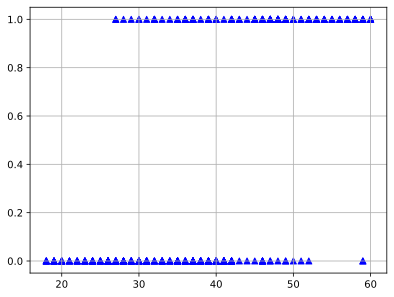

In [13]:
plt.scatter(x= df.Age, y = df.Purchased,color ='blue', marker = '^')
plt.grid()

Gender
Female    204
Male      196
Name: count, dtype: int64


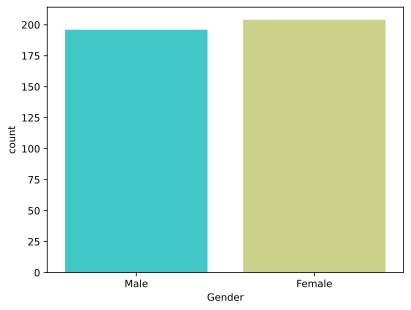

In [14]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        sns.countplot(df, x =df[i], palette = 'rainbow')

<Axes: ylabel='Density'>

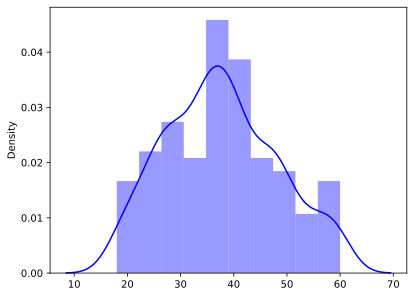

In [15]:
sns.distplot(df, x = df['Age'], color = 'blue')

<Axes: ylabel='Density'>

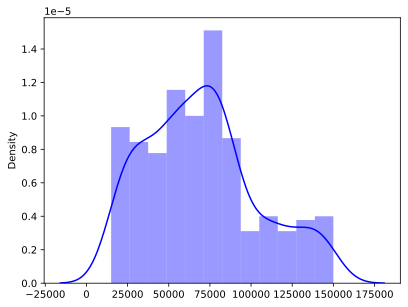

In [16]:
sns.distplot(df, x = df['EstimatedSalary'], color = 'blue')

<Axes: xlabel='Purchased', ylabel='count'>

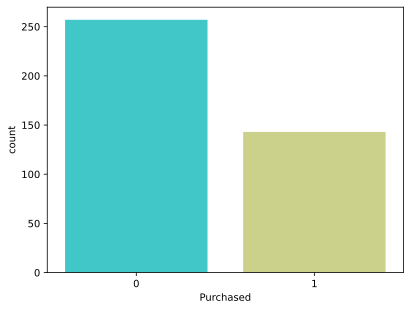

In [17]:
df['Purchased'].value_counts()
sns.countplot(df, x =df['Purchased'], palette = 'rainbow')

In [18]:
df_gen = df.groupby(['Gender','Purchased'])['Purchased'].count()

In [19]:
df_gen

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: Purchased, dtype: int64

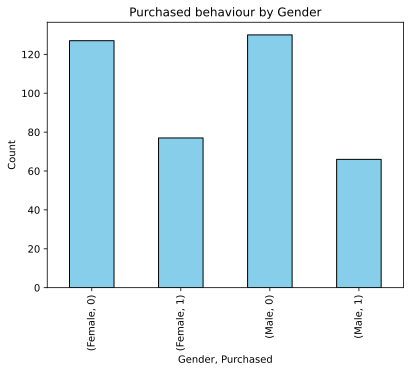

In [20]:
df_gen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender, Purchased')
plt.ylabel('Count')
plt.title('Purchased behaviour by Gender')
plt.show()

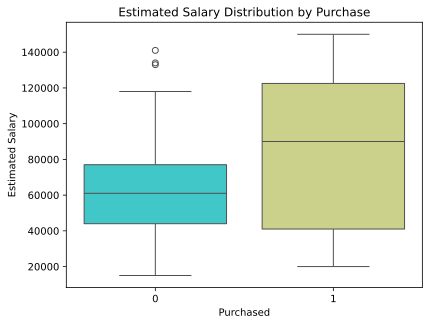

In [21]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette = 'rainbow')
plt.title('Estimated Salary Distribution by Purchase')
plt.xlabel('Purchased')
plt.ylabel('Estimated Salary')
plt.show()

### Testing the Relationship Between Gender and EstimatedSalary
* **Null Hypothesis (H₀):** There is no difference in the mean `EstimatedSalary` between males and females.
* **Alternative Hypothesis (H₁):** There is a difference in the mean `EstimatedSalary` between males and females.

In [23]:
from scipy.stats import ttest_ind
male_salary = df[df['Gender'] == 'Male']['EstimatedSalary']
female_salary = df[df['Gender'] == 'Female']['EstimatedSalary']

t_stat, p_value = ttest_ind(male_salary, female_salary)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -1.2078759964501578, P-Value: 0.22781220912792477


**P-Value (0.2278):** The p-value is greater than the common significance level of 0.05. This means that there is not enough evidence to reject the null hypothesis.

**Conclusion:** You fail to reject the null hypothesis, which suggests that there is no statistically significant difference in the mean EstimatedSalary between males and females in this dataset. In simpler terms, gender does not appear to have a significant effect on EstimatedSalary based on this test.

### Testing the Relationship Between Purchased and Age
* **Null Hypothesis (H₀):** The mean Age of users who purchased and those who did not purchase is the same.
* **Alternative Hypothesis (H₁):** The mean Age of users who purchased and those who did not purchase is different.

In [26]:
purchased_age = df[df['Purchased'] == 1]['Age']
not_purchased_age = df[df['Purchased'] == 0]['Age']

t_stat, p_value = ttest_ind(purchased_age, not_purchased_age)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 15.86638147378889, P-Value: 2.8002339432724217e-44


**P-Value (2.8e-44):** The p-value is extremely small, far less than 0.05. This indicates that the observed difference in the mean Age between users who purchased and those who did not is highly statistically significant.

**Conclusion:** You reject the null hypothesis, which suggests that there is a statistically significant difference in the mean Age between users who made a purchase and those who did not. In other words, age is likely an important factor influencing whether or not a user made a purchase.

# Data Preprocessing

In [29]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [30]:
df = df.drop(['User ID'],axis=1)

#### Deifining X and y varaible as independent and dependent variable.

In [32]:
X = df.drop(['Purchased'],axis=1)
y = df['Purchased']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state =10, stratify=y)

# Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(fit_intercept=True,tol=1e-4,class_weight='balanced')
logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Logistic Regression:
Despite its name, this is a classification model, not a linear regression model. It predicts the probability of a binary outcome (such as 0 or 1) and is often used for binary classification tasks. The output is a probability between 0 and 1, which is then typically converted into a class label (e.g., 0 or 1) based on a threshold (usually 0.5).

1. **`fit_intercept=True`**:
   - **Description**: This parameter adds an intercept (also called a bias term) to the model. The intercept allows the model to fit the data better by accounting for the baseline probability of the outcome when all features are set to zero.
   - **Impact**: Including the intercept makes the model more flexible and typically leads to better performance, especially when the baseline probability is not zero.

2. **`tol=1e-4`**:
   - **Description**: This parameter sets the tolerance for the stopping criteria. The training process will stop when the change in the model's coefficients between iterations is less than this value.
   - **Impact**: A smaller `tol` value like `1e-4` (0.0001) makes the model training more precise, as it requires the algorithm to converge more closely before stopping. However, this may also result in longer training times.

3. **`class_weight='balanced'`**:
   - **Description**: This parameter automatically adjusts the weights of the classes in the data. If your dataset is imbalanced (i.e., one class appears more frequently than the other), this parameter will balance the class weights inversely proportional to their frequencies.
   - **Impact**: Using `class_weight='balanced'` helps the model handle imbalanced datasets more effectively, preventing it from being biased toward the majority class. It ensures that the model pays more attention to the minority class, which can improve predictive performance on that class.

**How the Model Works:**

- **Training Process**: The logistic regression model learns by optimizing the coefficients of the input features to minimize the difference between the predicted probabilities and the actual labels. The model uses a sigmoid function to convert the linear combination of features into a probability.
  
- **Balanced Classes**: By setting `class_weight='balanced'`, the model gives more importance to the minority class during training, which is crucial because we have imbalanced data (i.e., many more instances of class 0 than class 1).

**Summary:**

Your logistic regression model is configured to include an intercept, ensuring better performance, especially when the baseline outcome probability is non-zero. The `tol=1e-4` makes the model training precise by allowing it to stop only when the model coefficients have converged closely. Finally, `class_weight='balanced'` ensures that the model accounts for any imbalance in the dataset, making it more reliable in predicting the minority class.

# Model Evaluation

In [38]:
print(f'Model Accuracy in training data : {logistic.score(X_train,y_train)}')
print(f'Model Accuracy in testing data : {logistic.score(X_test,y_test)}')

Model Accuracy in training data : 0.834375
Model Accuracy in testing data : 0.9375


In [39]:
y_pred = logistic.predict(X_test)

In [40]:
y_proba = logistic.predict_proba(X_test)[:, 1]

In [41]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, roc_auc_score, roc_curve, log_loss, 
                             precision_recall_curve, matthews_corrcoef)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9375
Precision: 0.8750
Recall: 0.9655
F1 Score: 0.9180


Text(0.5, 1.0, 'Confusion Matrix')

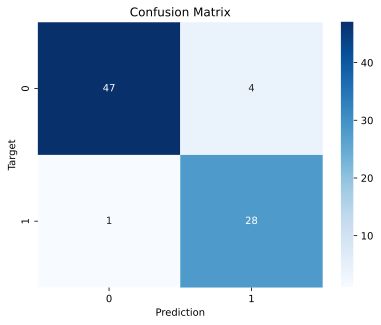

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [44]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.4f}')

Specificity: 0.9216


In [45]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')

Matthews Correlation Coefficient (MCC): 0.8705


In [46]:
logloss = log_loss(y_test, y_proba)
print(f'Log Loss: {logloss:.4f}')

Log Loss: 0.2793


AUC-ROC: 0.9723


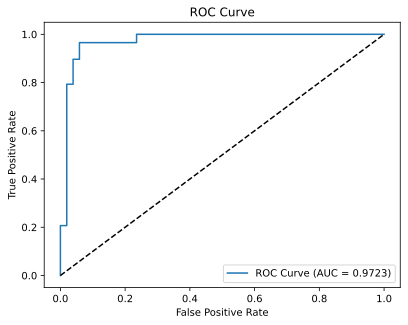

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_roc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc_roc:.4f}')

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

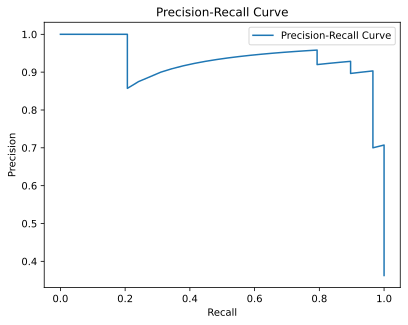

In [48]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Model Performance

| **Metric**                            | **Value**    | **Interpretation**                                                                            |
|---------------------------------------|--------------|-----------------------------------------------------------------------------------------------|
| **Training Accuracy**                 | 0.8344 (83.44%) | The model correctly predicts 83.44% of the training data.                                      |
| **Test Accuracy**                     | 0.9375 (93.75%) | The model correctly predicts 93.75% of the test data.                                          |
| **Precision**                         | 0.8750 (87.50%) | Of all positive predictions, 87.50% were correct.                                               |
| **Recall**                            | 0.9655 (96.55%) | The model correctly identified 96.55% of actual positive cases.                                 |
| **F1 Score**                          | 0.9180 (91.80%) | A balanced measure combining precision and recall.                                              |
| **Specificity**                       | 0.9216 (92.16%) | The model correctly identified 92.16% of actual negative cases.                                 |
| **Matthews Correlation Coefficient**  | 0.8705       | Strong positive correlation between predicted and actual classes.                              |
| **Log Loss**                          | 0.2793       | Indicates low uncertainty in predictions.                                                      |
| **AUC-ROC**                           | 0.9723 (97.23%) | The model has a 97.23% chance of correctly distinguishing between positive and negative cases. |


**Confusion Matrix**:
  - `[[47  4] [ 1 28]]` means:
    - True Negatives (TN): 47 (correctly predicted negatives(i.e., 0)).
    - False Positives (FP): 4 (incorrectly predicted as positive(i.e., 1)).
    - False Negatives (FN): 1 (incorrectly predicted as negative(i.e., 0)).
    - True Positives (TP): 28 (correctly predicted positives(i.e., 1)).
    - Out of 80 test cases, the model made 5 errors (4 false positives and 1 false negative), showing strong predictive performance.

# Vizualizing Best Fit Line and Best Fit Surfaces

In [51]:
from mpl_toolkits.mplot3d import Axes3D

In [52]:
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

### Visualizing with One Independent Feature (Gender)

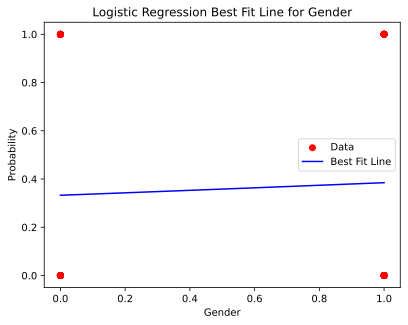

In [54]:
plt.figure()
plt.scatter(X_test[:, 0], y_test, color='red', label='Data')
X_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100).reshape(-1, 1)
X_fixed = np.mean(X_test[:, 1:], axis=0).reshape(1, -1)  # Use the mean of other features
X_input = np.hstack([X_range, np.repeat(X_fixed, 100, axis=0)])
y_prob = logistic.predict_proba(X_input)[:, 1]
plt.plot(X_range, y_prob, color='blue', label='Best Fit Line')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.title('Logistic Regression Best Fit Line for Gender')
plt.legend()
plt.show()

### Visualizing with Two Independent Features (Gender, Age)

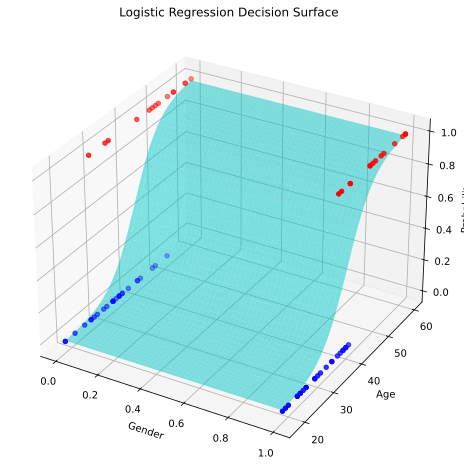

In [56]:
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c=y_test, cmap='bwr', marker='o')

X_range_1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50)
X_range_2 = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50)
X1, X2 = np.meshgrid(X_range_1, X_range_2)

X_input = np.c_[X1.ravel(), X2.ravel(), np.full(X1.ravel().shape, np.mean(X_test[:, 2]))]

y_prob = logistic.predict_proba(X_input)[:, 1].reshape(X1.shape)

ax.plot_surface(X1, X2, y_prob, color='cyan', alpha=0.5)

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Probability')
ax.set_title('Logistic Regression Decision Surface')

plt.show()

### Vizualizing Pair Plots and Decision Boundaries
Pair Plots (two features at a time) to visualize decision boundaries in 2D, though this won’t give you a "best fit line" but rather a "best fit surface.

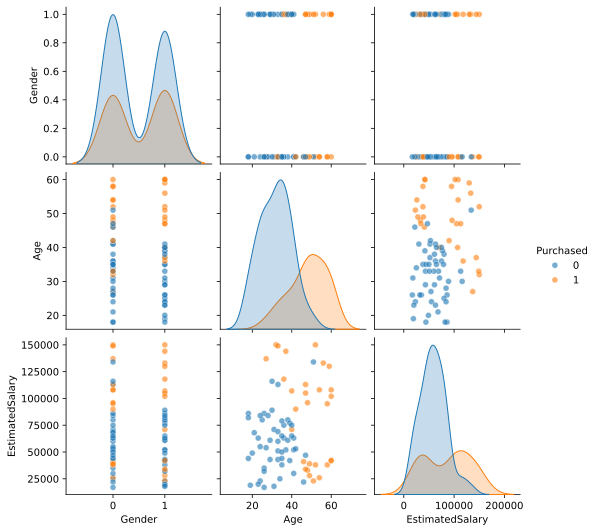

In [58]:
df = pd.DataFrame(np.hstack([X_test, y_test.reshape(-1, 1)]), columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])
sns.pairplot(df, hue='Purchased', plot_kws={'alpha': 0.6})
plt.show()

# Model Prediction in New Data

In [60]:
gender = float(input("Enter Gender of person(0-female, 1-male): "))
age = float(input("Enter Age of person: "))
salary = float(input("Enter EstimatedSalary of Person: "))
print(f'Gender:{gender}\nAge:{age}\nEstimatedSalary:{salary}\n')

new_data = [[gender, age, salary]]
prediction = logistic.predict(new_data)
probability = logistic.predict_proba(new_data)

print(f"\nPurchased: {prediction[0]}")
print(f"Prediction Probability: {probability[0]}")

Enter Gender of person(0-female, 1-male):  1
Enter Age of person:  45
Enter EstimatedSalary of Person:  23000


Gender:1.0
Age:45.0
EstimatedSalary:23000.0


Purchased: 0
Prediction Probability: [0.61306134 0.38693866]
